In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# 한글깨질 경우
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


In [109]:
train = pd.read_csv("./open-2/train.csv")
test = pd.read_csv("./open-2/test.csv")

In [110]:
# 데이터 확인
display(train.head(3))
display(test.head(3))

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0


,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일
0,TEST_000,서류확인,223000000.0,530000,NaN,5.0,5.0,남향,1.0,1.0,불가능,NaN,7,Z86Th6S3K5,D플랫폼,2024-10-21
1,TEST_001,서류확인,150500000.0,590000,30.26,7.0,11.0,서향,1.0,1.0,불가능,16.0,11,G52Iz8V2B9,D플랫폼,2023-09-02
2,TEST_002,현장확인,47000000.0,200000,41.50,2.0,3.0,남서향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-04-03


In [111]:
# 결측치 및 데이터 정보 확인
print(train.isnull().sum())
print("-----"*5)
print(train.dtypes)
print("-----"*5)
print(train.shape)
# 결측 데이터: 전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수

ID          0
매물확인방식      0
보증금         0
월세          0
전용면적      787
해당층       229
총층         16
방향          0
방수         16
욕실수        18
주차가능여부      0
총주차대수     696
관리비         0
중개사무소       0
제공플랫폼       0
게재일         0
허위매물여부      0
dtype: int64
-------------------------
ID         object
매물확인방식     object
보증금       float64
월세          int64
전용면적      float64
해당층       float64
총층        float64
방향         object
방수        float64
욕실수       float64
주차가능여부     object
총주차대수     float64
관리비         int64
중개사무소      object
제공플랫폼      object
게재일        object
허위매물여부      int64
dtype: object
-------------------------
(2452, 17)


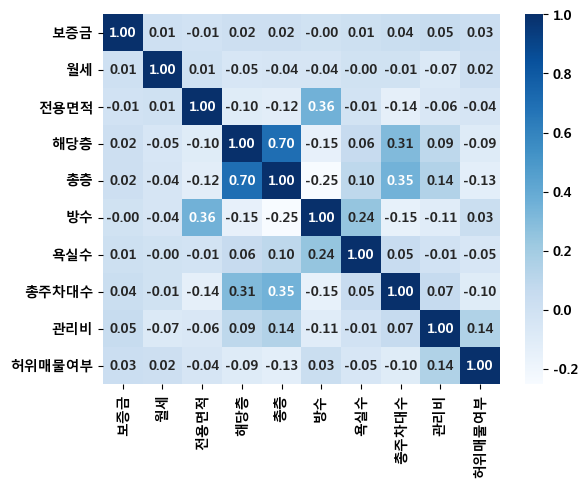

In [112]:
a = sns.heatmap(train.corr(numeric_only=True), cmap='Blues', annot=True, fmt=".2f")
plt.show(a)

### 1. 데이터 시각화를 통한 EDA
### 2. 데이터 전처리
### 이 두개가 우선적으로 이루어져야 함

In [113]:
# 기초통계량 확인
train.describe()

,보증금,월세,전용면적,해당층,총층,방수,욕실수,총주차대수,관리비,허위매물여부
count,2.452000e+03,2452.000000,1665.000000,2223.000000,2436.000000,2436.000000,2434.000000,1756.000000,2452.000000,2452.000000
mean,1.574188e+08,380420.065253,27.009628,4.848403,8.052545,1.378079,1.034511,20.332574,5.477977,0.121533
std,1.212794e+08,206425.413601,7.951757,3.543348,4.920112,0.485007,0.182575,28.939900,5.631185,0.326813
min,5.000000e+06,0.000000,17.500000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,7.500000e+07,200000.000000,19.800000,2.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000
50%,1.325000e+08,380000.000000,26.400000,4.000000,6.000000,1.000000,1.000000,10.000000,5.000000,0.000000
75%,1.890000e+08,550000.000000,32.110000,6.000000,10.000000,2.000000,1.000000,31.000000,9.000000,0.000000
max,4.090000e+08,750000.000000,49.970000,21.000000,21.000000,2.000000,2.000000,590.000000,96.000000,1.000000


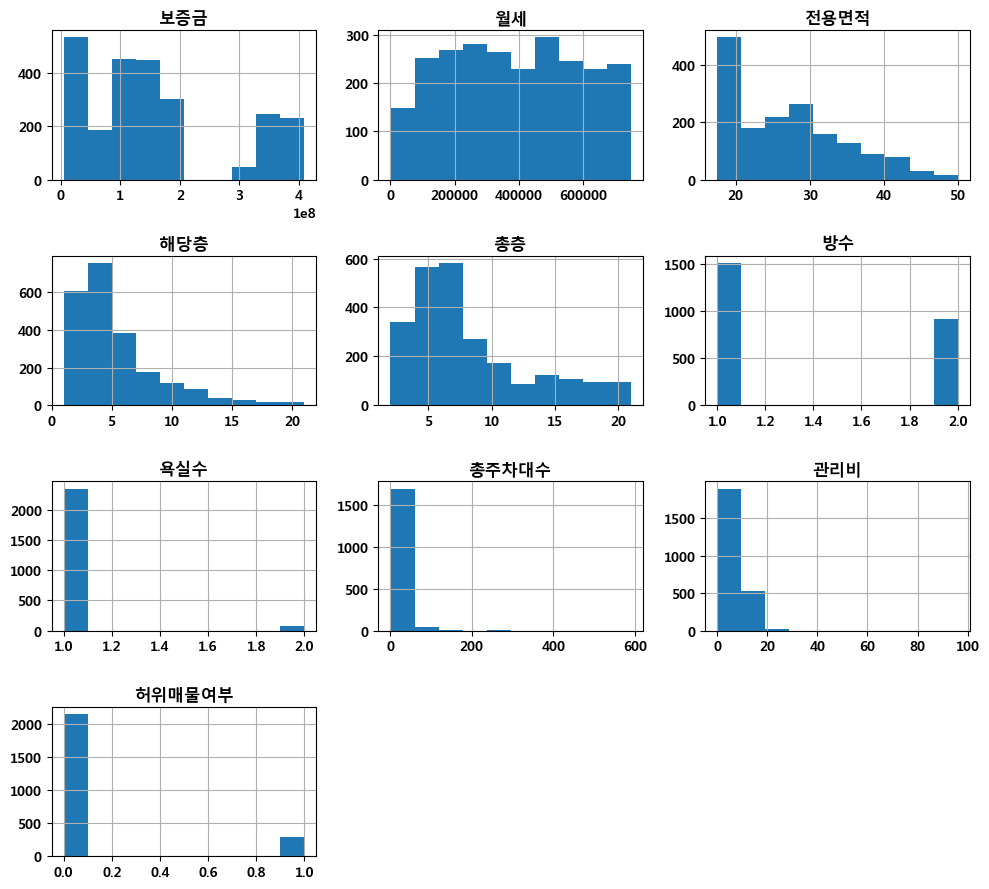

In [114]:
# 시각화 hist
train.hist(figsize=(10,9))
plt.tight_layout() # 간격설정
plt.show()

# 월세는 다양하게 분포
# 전용면적, 해당층, 총층은 skew > 0 으로 보임
# 욕실은 1개에 치우쳐 있음
# 총 주차대수는 50미만인 경우가 다수

# 현재 데이터 정보에서 추가적으로 라벨링 해서 보면 좋을게 있어보임

,0,1,2,3,4,5,6,7,8,9,10,11
col_0,,,,,,,,,,,,
제공플랫폼,A플랫폼,B플랫폼,C플랫폼,D플랫폼,E플랫폼,F플랫폼,G플랫폼,H플랫폼,I플랫폼,J플랫폼,K플랫폼,L플랫폼
count,120,64,47,37,12,3,6,4,1,2,1,1


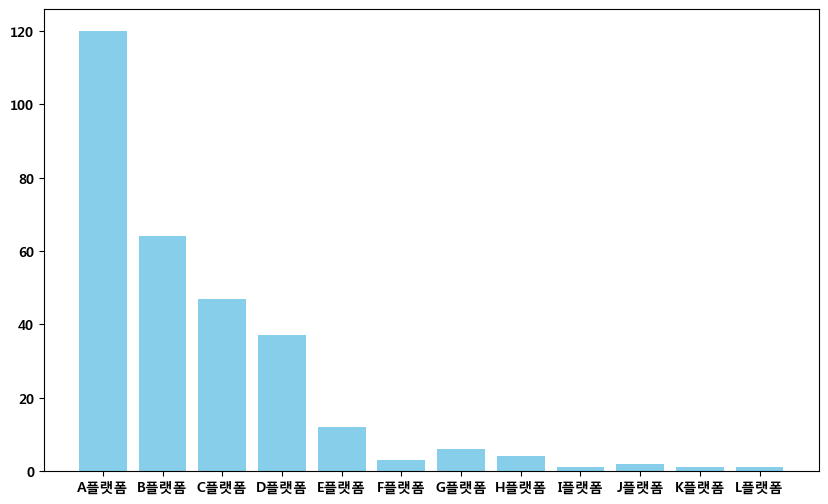

In [115]:
# 플랫폼에 따른 분류
# 전체 데이터 개수
all_count_df = pd.crosstab(train['제공플랫폼'], 'count')
all_count_df = pd.DataFrame(all_count_df).reset_index()

# 허위매물데이터만 모아놓기
fake_df = train[train['허위매물여부']==1]

# 플랫폼별 허위매물 개수
fake_count_df = pd.crosstab(fake_df['제공플랫폼'], 'count')
fake_count_df = pd.DataFrame(fake_count_df).reset_index()
display( fake_count_df.T )

plt.figure(figsize=(10, 6))
plt.bar(fake_count_df['제공플랫폼'], fake_count_df['count'], color='skyblue')
plt.show()

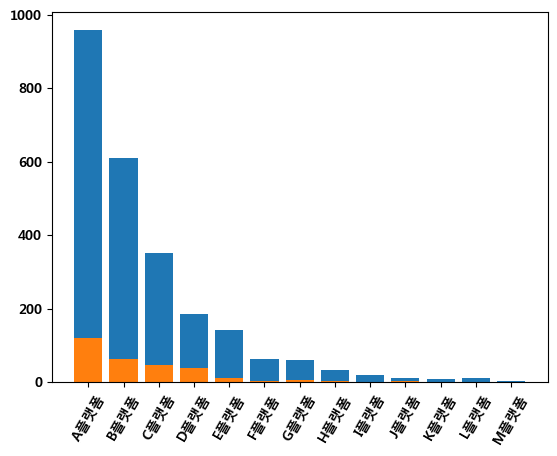

In [116]:
# 데이터의 비율을 시각적으로 확인
plt.bar(all_count_df['제공플랫폼'], all_count_df['count'], label='count', align='center') 
plt.bar(fake_count_df['제공플랫폼'], fake_count_df['count'], label='count', align='center') 
plt.xticks(rotation=60)
plt.show()

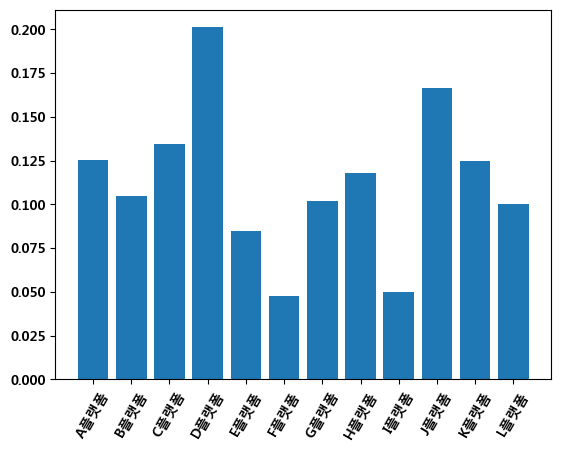

In [117]:
# 비율을 막대그래프로 보자
fake_ratio = fake_count_df['count'] / all_count_df['count']
plt.bar(all_count_df['제공플랫폼'], fake_ratio)
plt.xticks(rotation=60)
plt.show()

# 비율로 봤을 때는 D와 J 플랫폼이 많은 것으로 확인

In [118]:
# 데이터 다시 확인
display(train.head(3))
display(set(train['매물확인방식']))
display(len(set(train['중개사무소'])))
display((pd.DataFrame(train.isnull().sum())).T)

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0


{'서류확인', '전화확인', '현장확인'}

279

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,0,0,0,0,787,229,16,0,16,18,0,696,0,0,0,0,0


In [124]:
train.describe()

,보증금,월세,전용면적,해당층,총층,방수,욕실수,총주차대수,관리비,허위매물여부
count,2.452000e+03,2452.000000,1665.000000,2223.000000,2436.000000,2436.000000,2434.000000,1756.000000,2452.000000,2452.000000
mean,1.574188e+08,380420.065253,27.009628,4.848403,8.052545,1.378079,1.034511,20.332574,5.477977,0.121533
std,1.212794e+08,206425.413601,7.951757,3.543348,4.920112,0.485007,0.182575,28.939900,5.631185,0.326813
min,5.000000e+06,0.000000,17.500000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,7.500000e+07,200000.000000,19.800000,2.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000
50%,1.325000e+08,380000.000000,26.400000,4.000000,6.000000,1.000000,1.000000,10.000000,5.000000,0.000000
75%,1.890000e+08,550000.000000,32.110000,6.000000,10.000000,2.000000,1.000000,31.000000,9.000000,0.000000
max,4.090000e+08,750000.000000,49.970000,21.000000,21.000000,2.000000,2.000000,590.000000,96.000000,1.000000


In [125]:
# 전처리
# 1. 필요없는거 버리기(ID)
train_drop = train.drop(['ID'], axis=1)

# 2. 결측치 보간(0: 전용면적, 해당층, 방수, 욕실수, 총주차대수   평균: 총층)
train_drop[['전용면적','해당층','방수','욕실수','총주차대수']] = train_drop[['전용면적','해당층','방수','욕실수','총주차대수']].fillna(0)
train_drop[['총층']] = train_drop[['총층']].fillna(train_drop['총층'].mean())


# 3. 이상치 제거
# 애초에 이상치에 대한 것이 애매,
# 부동산에 등록된 데이터는 이상치일 수 있는가
# 널 처리가 중요

# train_inliers = train_numeric[~((train_numeric < (q1 - 1.5 * iqr)) | (train_numeric > (q3 + 1.5 * iqr))).any(axis=1)]
# train_in = train_drop.loc[train_inliers.index]

# 지금까지 데이터 상관관계 확인
# 이상치를 제거하니 허위매물들이 모두 걸러짐 -> 이상치가 허위매물일 가능성
# 이상치 값만 모아보자
# 뭔가 에러가 있어서 그런것으로 확인
# 0과 1로만 이루어진 것들에서 이상치 제거시 문제가 발생 iqr이 제대로 안구해짐 -> 이상치를 제거할 컬럼만 따로 모으기
# train_outliers = train_numeric[((train_numeric < (q1 - 1.5 * iqr)) | (train_numeric > (q3 + 1.5 * iqr))).any(axis=1)]


# 3.5 라벨링 이전에 데이터 타입 변환 필요한거: 게재일
train_drop['게재일'] = pd.to_datetime(train_drop.게재일).apply(lambda x : x.timestamp())




In [126]:
# 4. 라벨링(겟더미: 주차가능여부, 매물확인방식, 플랫폼, 라벨링: 방향)
#     라벨링
label_encoder = LabelEncoder()
print(set(train_drop['방향']))
mapping = {'북동향': 1,
           '북서향': 3, 
           '남동향': 7, 
           '남향': 6, 
           '북향': 2, 
           '동향': 0, 
           '남서향': 5, 
           '서향': 4,
          }
train_drop['방향'] = train_drop.방향.map(mapping)
중개사무소_full = train['중개사무소'].append(test['중개사무소'])
label_encoder.fit(중개사무소_full)
train_drop['중개사무소'] = label_encoder.transform(train_drop['중개사무소'])

train_labelled = pd.get_dummies(train_drop, drop_first=True)
# 이상치는 모두 허위매물이였다. 뭐
# 5. 예측할 값 분리
x = train_labelled.drop(['허위매물여부'], axis=1)
y = train_labelled['허위매물여부']

{'북동향', '북서향', '남동향', '남향', '북향', '동향', '남서향', '서향'}


/var/folders/p_/qrpm_ybn1234ds6_08hw0lrc0000gn/T/ipykernel_18839/341271591.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  중개사무소_full = train['중개사무소'].append(test['중개사무소'])


In [127]:
# 케이스 나누기
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# 모델 생성
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [128]:
# 모델 예측 
y_pred = model.predict(x_val)
# 점수 기록
print(accuracy_score(y_val, y_pred))

0.945010183299389


In [ ]:
# (1차 마무리단계)최적모델 찾기
# 평가할 하이퍼파라미터 범위 설정
param_grid = {
    'n_estimators': [50, 75, 100, 125, 150, 175, 200],  # 트리 개수
    'max_depth': [None, 5, 10, 15, 20, 25, 30],  # 트리 최대 깊이
    'min_samples_split': [2, 3, 4, 5, 7, 10],  # 노드를 분할하는데 필요한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4, 4]     # 리프 노드의 최소 샘플 수
}
# 그리드 서치 객체 생성 (교차 검증 5번 진행)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1_macro')

# 그리드 서치를 이용한 학습
grid_search.fit(x_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적 모델을 사용한 테스트 성능 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_val)
print(classification_report(y_val, y_pred))

In [ ]:
# 최적의 하이퍼파라미터: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 150}
# 최적의 하이퍼파라미터: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}

In [130]:
# 점수확인
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_val)
macro_f1 = f1_score(y_val, y_pred, average='macro')
print(macro_f1)

0.8347070641255361


### 파이프라인만들어서 test데이터 평가하기

In [143]:
# 전처리
# 1. 필요없는거 버리기(ID)
test_drop = test.drop(['ID'], axis=1)

# 2. 결측치 보간(0: 전용면적, 해당층, 방수, 욕실수, 총주차대수   평균: 총층)
test_drop[['전용면적','해당층','방수','욕실수','총주차대수']] = test_drop[['전용면적','해당층','방수','욕실수','총주차대수']].fillna(0)
test_drop[['총층']] = test_drop[['총층']].fillna(test_drop['총층'].mean())

# 이상치제거 -> 일단 지금은 없음
# 3.5 라벨링 이전에 데이터 타입 변환 필요한거: 게재일
test_drop['게재일'] = pd.to_datetime(test_drop.게재일).apply(lambda x : x.timestamp())

# 4. 라벨링(겟더미: 주차가능여부, 매물확인방식, 플랫폼, 라벨링: 방향)
#     라벨링
test_drop['방향'] = test_drop.방향.map(mapping)
test_drop['중개사무소'] = label_encoder.transform(test_drop['중개사무소'])

test_labelled = pd.get_dummies(test_drop, drop_first=True)
# 이상치는 모두 허위매물이였다. 뭐
# 5. 예측할 값 분리


In [ ]:
# 모델 합쳐서 전처리하고 분리해야겠네

In [ ]:
# 예측값, 점수확인은 못함
y_pred = best_model.predict(test_labelled)

In [138]:
test_id = test[['ID']]
fake = pd.DataFrame(y_pred, columns = ['허위매물여부'])
answer = pd.concat([test_id, fake], axis=1)
answer.to_csv('answer_25011801.csv', index=False, encoding='utf-8-sig')

In [142]:
test_labelled

,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,총주차대수,관리비,...,제공플랫폼_C플랫폼,제공플랫폼_D플랫폼,제공플랫폼_E플랫폼,제공플랫폼_F플랫폼,제공플랫폼_G플랫폼,제공플랫폼_H플랫폼,제공플랫폼_I플랫폼,제공플랫폼_K플랫폼,제공플랫폼_L플랫폼,제공플랫폼_N플랫폼
0,223000000.0,530000,0.00,5.0,5.0,6,1.0,1.0,0.0,7,...,0,1,0,0,0,0,0,0,0,0
1,150500000.0,590000,30.26,7.0,11.0,4,1.0,1.0,16.0,11,...,0,1,0,0,0,0,0,0,0,0
2,47000000.0,200000,41.50,2.0,3.0,5,2.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,133000000.0,250000,31.35,5.0,6.0,6,2.0,1.0,0.0,5,...,0,0,0,0,0,0,0,0,0,0
4,108000000.0,380000,23.14,2.0,3.0,6,1.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,152500000.0,340000,30.83,4.0,6.0,7,1.0,1.0,1.0,2,...,0,0,0,0,0,0,0,0,0,0
609,226500000.0,750000,29.88,0.0,10.0,5,2.0,1.0,34.0,7,...,0,0,0,0,0,0,0,0,0,0
610,169500000.0,500000,30.73,5.0,6.0,6,1.0,1.0,33.0,6,...,0,0,0,1,0,0,0,0,0,0
611,180000000.0,340000,17.50,3.0,6.0,7,1.0,1.0,2.0,8,...,1,0,0,0,0,0,0,0,0,0


In [180]:
# 지금까지 한거 완전판으로 정리
# 데이터 합치기
df_full = pd.concat([train, test])
#결측치처리
df_full[['전용면적','해당층','방수','욕실수','총주차대수']] = df_full[['전용면적','해당층','방수','욕실수','총주차대수']].fillna(0)
df_full[['총층']] = df_full[['총층']].fillna(df_full['총층'].mean())

# 데이터 전처리
#     게재일 데이터 처리
df_full['게재일'] = pd.to_datetime(df_full.게재일).apply(lambda x : x.timestamp())

df_full = df_full.drop(['ID'], axis=1)
mapping = {'북동향': 1,
           '북서향': 3, 
           '남동향': 7, 
           '남향': 6, 
           '북향': 2, 
           '동향': 0, 
           '남서향': 5, 
           '서향': 4,
          }
df_full['방향'] = df_full['방향'].map(mapping)
label_encoder = LabelEncoder()
df_full['중개사무소'] = label_encoder.fit_transform(df_full['중개사무소'])
df_full_labelled = pd.get_dummies(df_full, drop_first=True)



# 데이터 나누기
train_scaled = df_full_labelled.iloc[:train.shape[0],]
test_scaled = df_full_labelled.iloc[train.shape[0]:,]
x = train_scaled.drop(['허위매물여부'], axis=1)
y = train_scaled['허위매물여부']
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# 모델링 생성 및 평가
model = RandomForestClassifier()
# 평가할 하이퍼파라미터 범위 설정
param_grid = {
    'n_estimators': [50, 75, 100, 125],  # 트리 개수
    'max_depth': [None, 5, 10, 15, 20, 30],  # 트리 최대 깊이
    'min_samples_split': [2, 3, 4, 5, 7, 10],  # 노드를 분할하는데 필요한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4, 4]     # 리프 노드의 최소 샘플 수
}


# 그리드 서치 객체 생성 (교차 검증 5번 진행)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='f1_macro')

# 그리드 서치를 이용한 학습
grid_search.fit(x_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
최적의 하이퍼파라미터: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 125}


In [ ]:
# 최적의 하이퍼파라미터: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 50}
# 최적 모델을 사용한 테스트 성능 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_val)
print(classification_report(y_val, y_pred))

# 점수
macro_f1 = f1_score(y_val, y_pred, average='macro')

# answer 만들기
test_scaled = test_scaled.drop(['허위매물여부'], axis=1)
imsi = best_model.predict(test_scaled)
imsi = pd.DataFrame(imsi, columns=['허위매물여부'])
answer = pd.concat([test[['ID']], imsi], axis=1)
answer.to_csv('25011801.csv', index=False, encoding='utf-8-sig')

In [183]:
answer.shape

(613, 2)

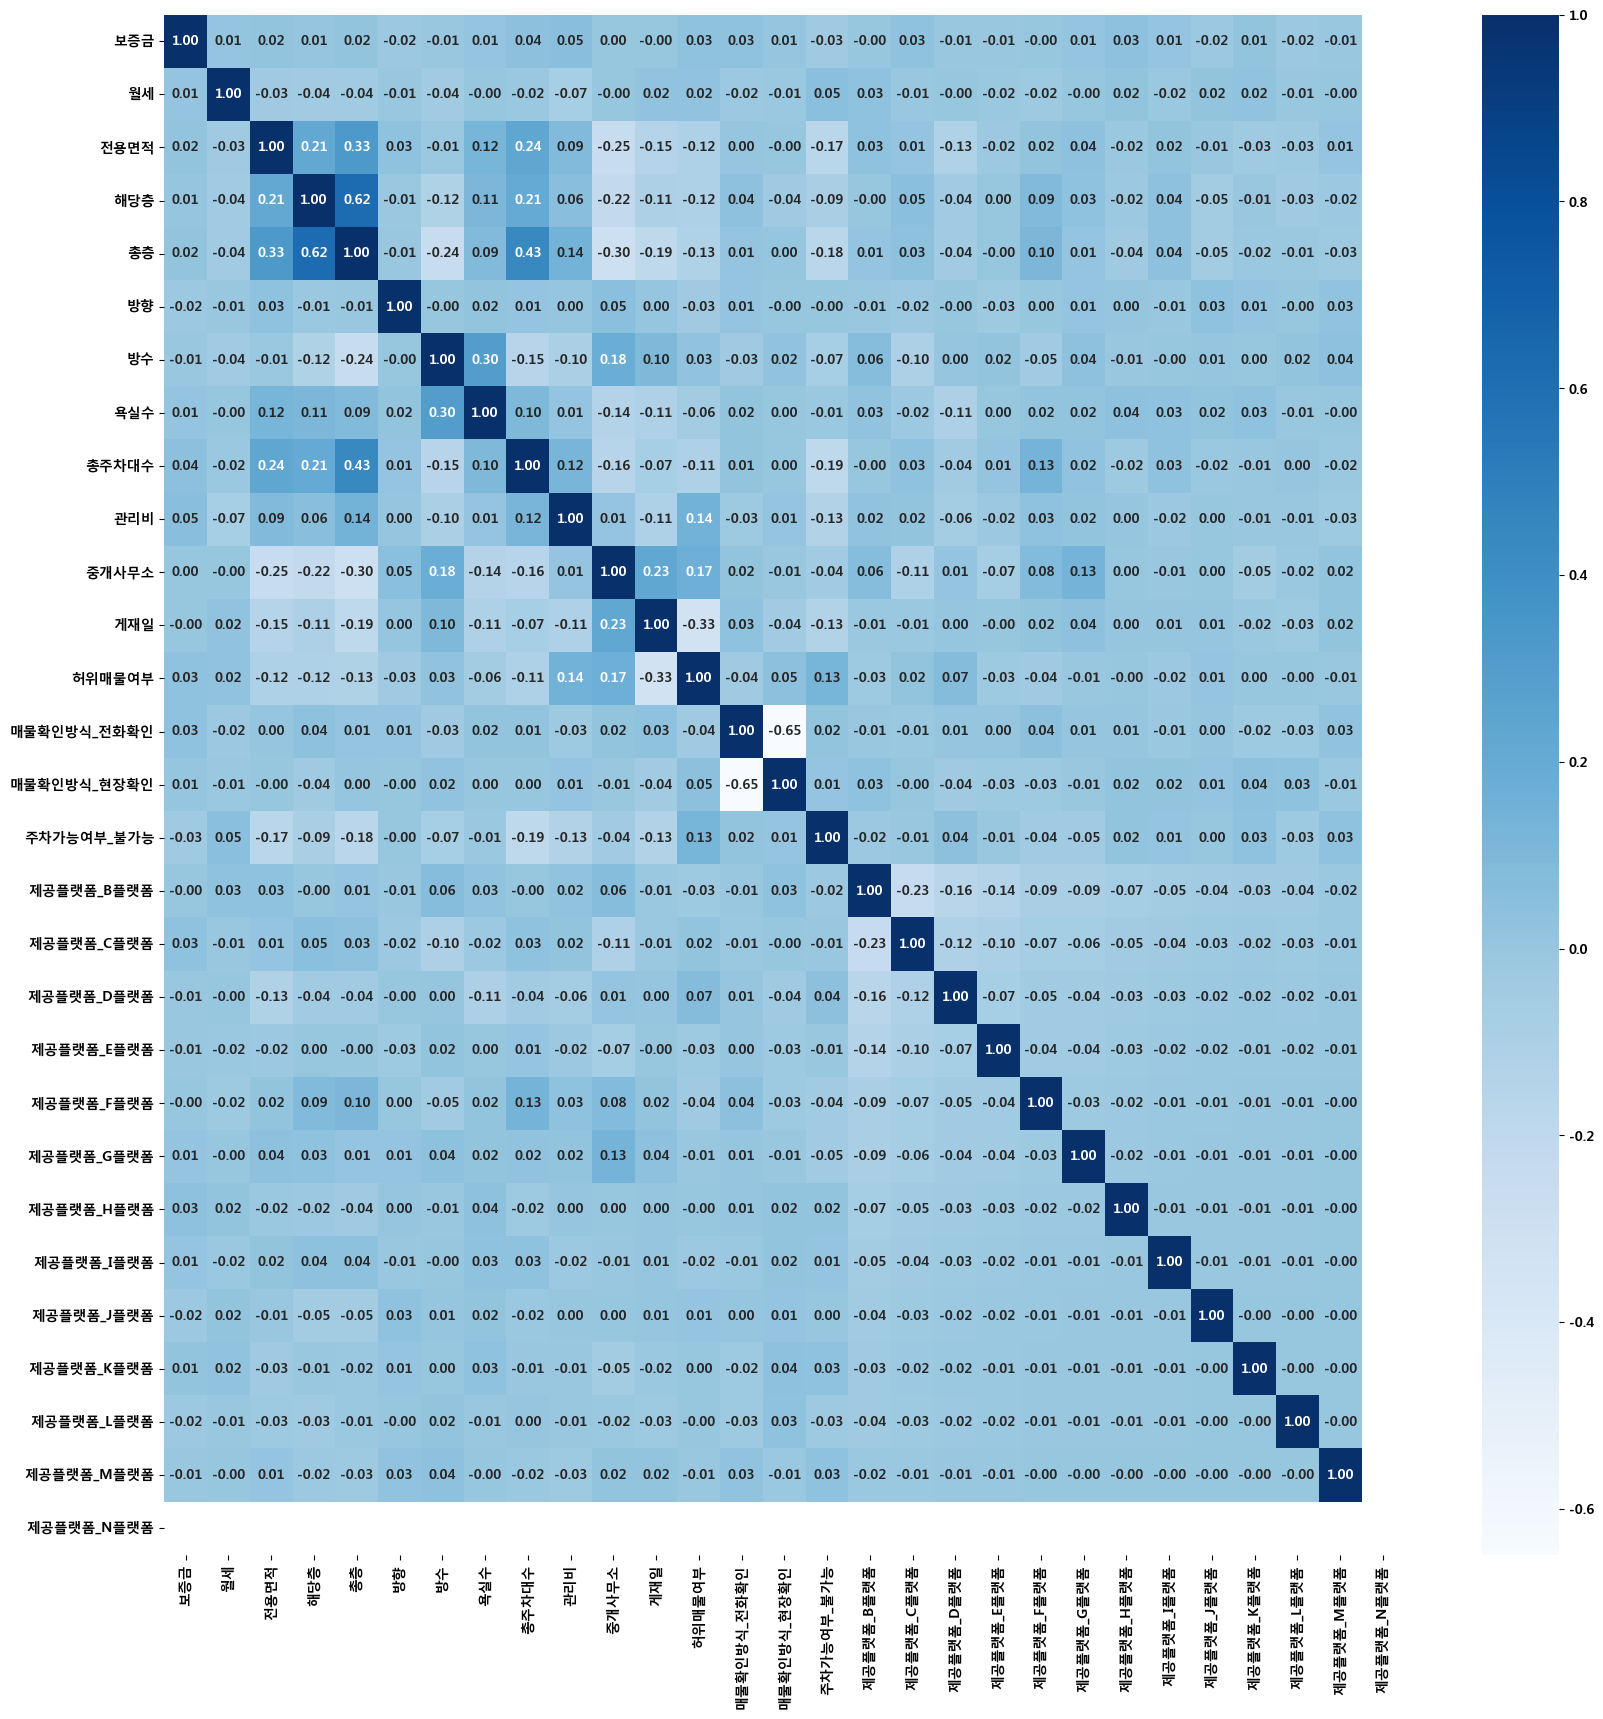

In [198]:
width = 20
height = 20
plt.figure(figsize=(width, height))
sns.heatmap(train_scaled.corr(), cmap='Blues', fmt='.2f',annot=True, )

plt.show()

In [199]:
# 추가로 살펴볼 것
# 플랫폼별 가격
# ㄴ차이가 있을 시에 플랫폼별로 결측치를 보간할 것
# 가격의 분포를 distplot을 사용해서 보기 박스플롯이랑 스캐터플롯도 좋음
# 날짜데이터에서 월 데이터 컬럼 만들어보기
# 도메인 정보를 알아볼 것
# 허위매물들과 아닌것들의 분포를 알아보자

/var/folders/p_/qrpm_ybn1234ds6_08hw0lrc0000gn/T/ipykernel_18839/1303138847.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=60)  # x축 회전


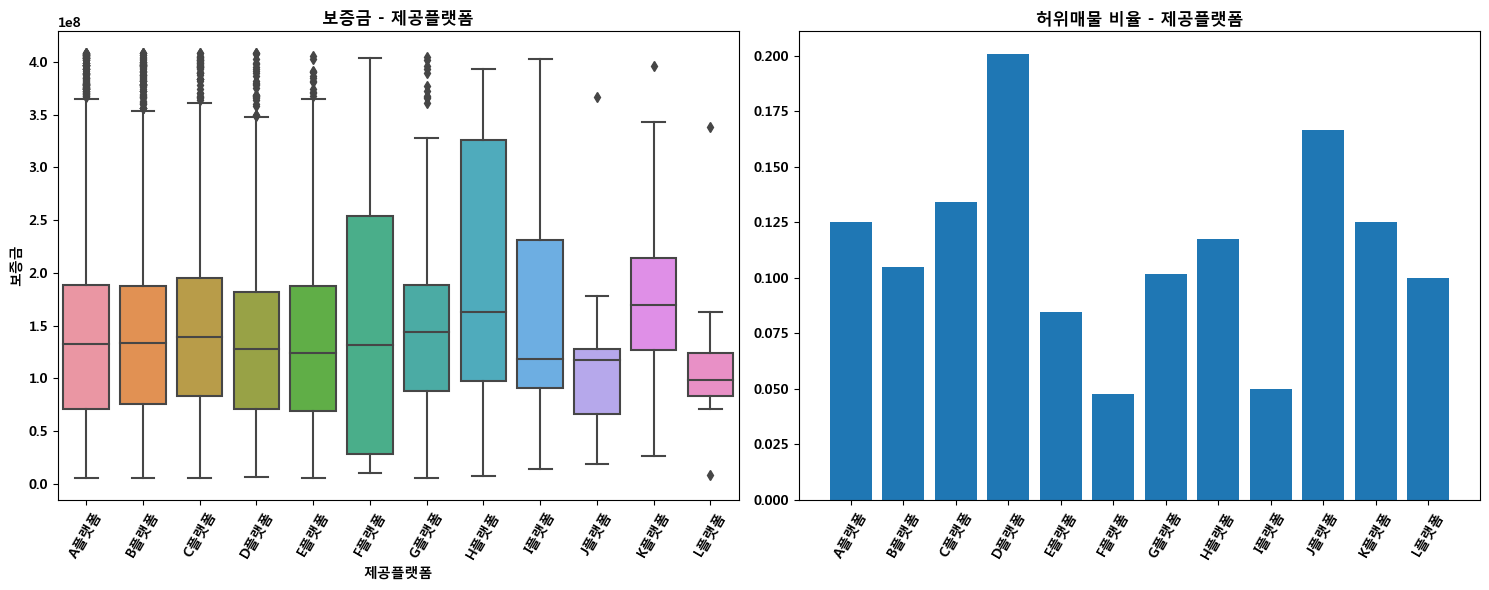

In [218]:
# 플랫폼별 가격
# 1행 2열 형태의 서브플롯 설정
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
# 정렬되어 나오도록 order 지정
order = ['A플랫폼','B플랫폼','C플랫폼','D플랫폼','E플랫폼','F플랫폼','G플랫폼','H플랫폼','I플랫폼','J플랫폼','K플랫폼','L플랫폼']

# 첫 번째 서브플롯: 제공플랫폼별 보증금 박스플롯
sns.boxplot(x='제공플랫폼', y='보증금', data=df_full.iloc[:train.shape[0],], ax=axes[0], order=order)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=60)  # x축 회전
axes[0].set_title('보증금 - 제공플랫폼')  # 제목 설정

# 두 번째 서브플롯: 제공플랫폼별 허위매물 비율 막대 그래프
fake_ratio = fake_count_df['count'] / all_count_df['count']
axes[1].bar(all_count_df['제공플랫폼'], fake_ratio)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=60)  # x축 회전
axes[1].set_title('허위매물 비율 - 제공플랫폼')  # 제목 설정

# 그래프 간 간격을 자동으로 조정
plt.tight_layout()

# 그래프 표시
plt.show()

# 결과적으로 뭔가 보이는게 없어보인다.

<Axes: xlabel='매물확인방식', ylabel='허위매물여부'>

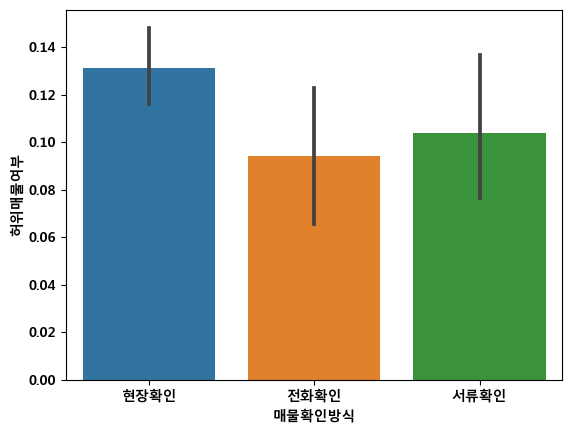

In [223]:
# 가격의 분포를 distplot을 사용해서 보기 박스플롯이랑 스캐터플롯도 좋음
exper_df = df_full.iloc[:train.shape[0],]
sns.barplot(x='매물확인방식',y='허위매물여부',data=exper_df)
# 이상하게 현장확인이 다른거에 비해 허위매물일 확률이 높아보임

<Axes: xlabel='매물확인방식', ylabel='월세'>

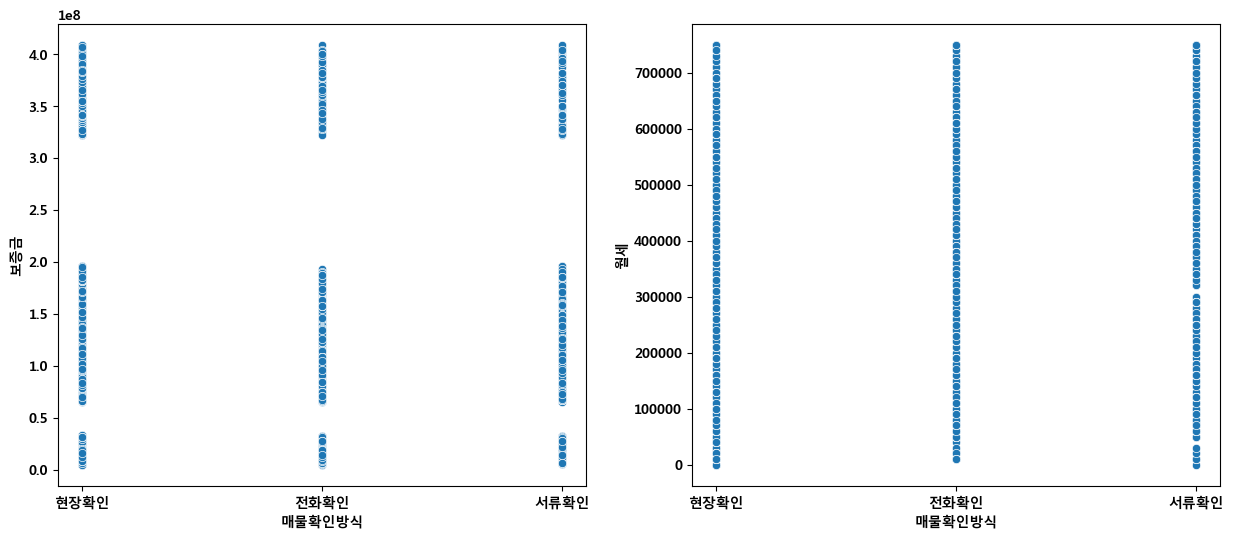

In [238]:
# 매물확인방식에 따른 가격 혹은 월세의 차이가 있는지 확인
plt.figure(figsize=(15, 6))

plt.subplot(121)
sns.scatterplot(x= '매물확인방식',y='보증금' , data= exper_df)

plt.subplot(122)
sns.scatterplot(x='매물확인방식',y='월세',data=exper_df)

In [255]:
# 새로운 컬럼 생성
exper_df['게시년'] = pd.to_datetime(train['게재일']).dt.year
exper_df['게시월'] = pd.to_datetime(train['게재일']).dt.month
exper_df['게시일'] = pd.to_datetime(train['게재일']).dt.day


/var/folders/p_/qrpm_ybn1234ds6_08hw0lrc0000gn/T/ipykernel_18839/1409688702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exper_df['게시년'] = pd.to_datetime(train['게재일']).dt.year
/var/folders/p_/qrpm_ybn1234ds6_08hw0lrc0000gn/T/ipykernel_18839/1409688702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exper_df['게시월'] = pd.to_datetime(train['게재일']).dt.month
/var/folders/p_/qrpm_ybn1234ds6_08hw0lrc0000gn/T/ipykernel_18839/1409688702.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부,게시년,게시월,게시일
0,현장확인,402500000.0,470000,0.0,0.0,15.0,4,1.0,1.0,가능,40.0,96,256,B플랫폼,2024-10-09,0.0,2024,10,9
1,현장확인,170500000.0,200000,0.0,3.0,4.0,7,2.0,1.0,불가능,0.0,0,240,D플랫폼,2024-12-26,0.0,2024,12,26
2,전화확인,114000000.0,380000,0.0,2.0,3.0,0,1.0,1.0,불가능,0.0,0,157,A플랫폼,2024-11-28,0.0,2024,11,28
3,현장확인,163500000.0,30000,36.3,3.0,9.0,7,2.0,1.0,가능,13.0,10,32,A플랫폼,2024-11-26,0.0,2024,11,26
4,현장확인,346000000.0,530000,0.0,3.0,3.0,0,2.0,1.0,불가능,0.0,0,76,B플랫폼,2024-06-25,1.0,2024,6,25


매물확인방식     object
보증금       float64
월세          int64
전용면적      float64
해당층       float64
총층        float64
방향          int64
방수        float64
욕실수       float64
주차가능여부     object
총주차대수     float64
관리비         int64
중개사무소       int64
제공플랫폼      object
게재일        object
허위매물여부    float64
게시년         int64
게시월         int64
게시일         int64
dtype: object


/var/folders/p_/qrpm_ybn1234ds6_08hw0lrc0000gn/T/ipykernel_18839/1254102554.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(exper_df.corr(), cmap='Blues',fmt='.2f',annot=True)


<Axes: >

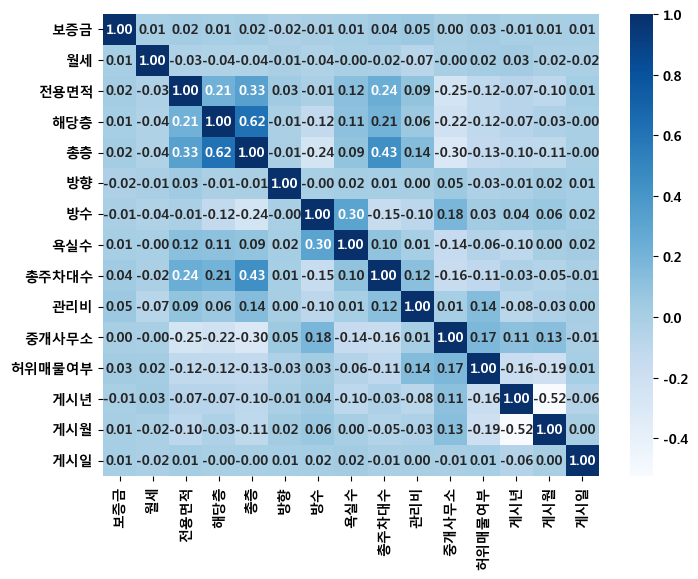

In [261]:
# 새로만든 컬럼 확인
display(exper_df.head())
print(exper_df.dtypes)
plt.figure(figsize=(8,6))
sns.heatmap(exper_df.corr(), cmap='Blues',fmt='.2f',annot=True)
# 게시일은 삭제해도 되고 게시월, 게시년은 상관성이 있어보임


/var/folders/p_/qrpm_ybn1234ds6_08hw0lrc0000gn/T/ipykernel_18839/3382427821.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exper_df['전용면적'])


<Axes: xlabel='전용면적', ylabel='Density'>

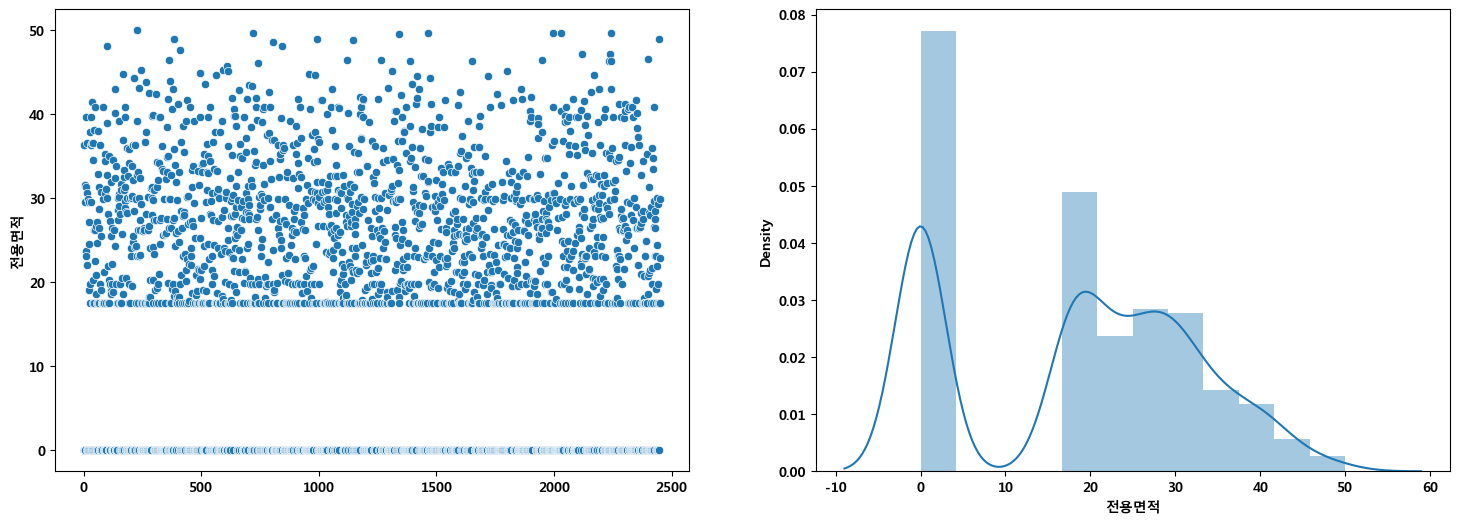

In [268]:
# 보증금과 월세가 허위매물과 연관이 없다?
# 가성비가 좋은 집, 넓은데 가격이 싼 곳이 그럴 가능성이 큼, 해당 데이터표는 이를 반영하지 못함 즉 설명변수 추가가 필요
# 
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.scatterplot(exper_df['전용면적'])

plt.subplot(122)
sns.distplot(exper_df['전용면적'])
# 전용면적은 0일 수가 없음
# 공용면적, 서비스면적, 전용면적이 있는데 이중 전용면적만 나와있음 
# 전용면적 결측치 보간에 대한 것이 필요

In [284]:
# '방수'와 '욕실수'로 그룹화하고, 해당 그룹의 '전용면적' 평균값으로 결측치 보간
exper_df['전용면적'] = train.groupby(['방수', '욕실수'])['전용면적'].transform(lambda x: x.fillna(x.mean()))
exper_df[exper_df['전용면적'].isnull()]
# 여기서도 안걸러지는것들은 제거하는게 좋아보이나 파이프라인으로 만드려면 보간을 하는게 나아보임 -> 그냥 0으로 보간
train.isnull().sum()

/var/folders/p_/qrpm_ybn1234ds6_08hw0lrc0000gn/T/ipykernel_18839/43542683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exper_df['전용면적'] = train.groupby(['방수', '욕실수'])['전용면적'].transform(lambda x: x.fillna(x.mean()))


ID          0
매물확인방식      0
보증금         0
월세          0
전용면적      787
해당층       229
총층         16
방향          0
방수         16
욕실수        18
주차가능여부      0
총주차대수     696
관리비         0
중개사무소       0
제공플랫폼       0
게재일         0
허위매물여부      0
dtype: int64

In [275]:
exper_df['전용면적'].isnull().sum()

18

In [285]:
임시 = train.sort_values(['보증금','월세'])

In [293]:
임시.head(3)

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
188,TRAIN_0188,현장확인,5000000.0,0,NaN,4.0,4.0,동향,1.0,1.0,불가능,1.0,9,Z18up3D1C3,A플랫폼,2024-08-27,1
789,TRAIN_0789,현장확인,5000000.0,210000,37.73,5.0,9.0,북서향,1.0,1.0,불가능,41.0,15,G52Iz8V2B9,C플랫폼,2024-06-02,0
428,TRAIN_0428,전화확인,5000000.0,270000,17.50,7.0,7.0,서향,1.0,1.0,불가능,1.0,19,u92NN7A1E5,A플랫폼,2024-01-15,1


In [316]:
# 보증금과 월세로 정렬하고 ffill사용
임시 = train.sort_values(['보증금','월세'])
임시['전용면적'] = 임시['전용면적'].fillna(method='ffill')
임시['전용면적'] = 임시['전용면적'].fillna(method='bfill')

In [317]:
임시

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
188,TRAIN_0188,현장확인,5000000.0,0,37.73,4.0,4.0,동향,1.0,1.0,불가능,1.0,9,Z18up3D1C3,A플랫폼,2024-08-27,1
789,TRAIN_0789,현장확인,5000000.0,210000,37.73,5.0,9.0,북서향,1.0,1.0,불가능,41.0,15,G52Iz8V2B9,C플랫폼,2024-06-02,0
428,TRAIN_0428,전화확인,5000000.0,270000,17.50,7.0,7.0,서향,1.0,1.0,불가능,1.0,19,u92NN7A1E5,A플랫폼,2024-01-15,1
73,TRAIN_0073,현장확인,5000000.0,550000,25.43,6.0,7.0,남향,1.0,1.0,가능,18.0,0,G52Iz8V2B9,A플랫폼,2024-03-23,0
2240,TRAIN_2240,현장확인,5000000.0,680000,34.71,3.0,8.0,동향,1.0,1.0,가능,18.0,8,S69fV9Z3J7,C플랫폼,2024-09-29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,TRAIN_0872,현장확인,409000000.0,40000,23.21,1.0,5.0,동향,1.0,1.0,불가능,22.0,5,G52Iz8V2B9,D플랫폼,2024-09-17,0
14,TRAIN_0014,전화확인,409000000.0,110000,23.21,3.0,10.0,남향,1.0,1.0,가능,5.0,10,H90uE4C0W5,A플랫폼,2024-11-02,0
1480,TRAIN_1480,서류확인,409000000.0,410000,23.21,NaN,7.0,동향,2.0,1.0,가능,4.0,15,u56qH5I5H8,B플랫폼,2024-10-06,0
901,TRAIN_0901,현장확인,409000000.0,540000,25.97,2.0,3.0,동향,1.0,1.0,가능,14.0,11,G52Iz8V2B9,A플랫폼,2024-10-24,0


In [303]:
임시.iloc[i]['전용면적'] == np.nan

False

In [318]:
test.isnull().sum()

ID          0
매물확인방식      0
보증금         0
월세          0
전용면적      184
해당층        50
총층          2
방향          0
방수          2
욕실수         2
주차가능여부      0
총주차대수     175
관리비         0
중개사무소       0
제공플랫폼       0
게재일         0
dtype: int64